![MLU Logo](../../data/MLU_Logo.png)

In this exercise, we will see how to get feature importance from sklearn trees. Our dataset is the MNIST: Handwritten Digit dataset.

In [1]:
import numpy as np
from mxnet import gluon

# Grab the MNIST dataset
x_train, y_train = gluon.data.vision.MNIST(train=True)[:]
x_test, y_test = gluon.data.vision.MNIST(train=False)[:]

x_train = x_train.asnumpy()
x_test = x_test.asnumpy()

# reshape and scale to be in [0,1]
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

__Feature importance with Decision Tree:__

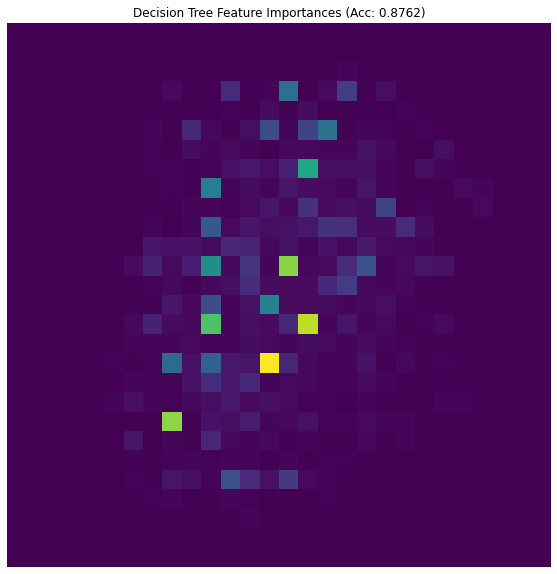

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

tree_features = DecisionTreeClassifier(random_state = 8675309)
tree_features.fit(x_train,y_train)

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(tree_features.feature_importances_.reshape(28,28))
plt.title("Decision Tree Feature Importances (Acc: {})".format(tree_features.score(x_test,y_test)))
plt.show()

__Feature importance with Random Forest:__

In [4]:
from sklearn.ensemble import RandomForestClassifier

# Do a quick sweep for optimal number of features
log = []
for i in np.arange(1, 28*28, 10):
    model = RandomForestClassifier(max_features = i, #number of features to consider when looking for the best split
                                   n_estimators = 15, #number of trees in the forest
                                   n_jobs = -1, # -1 means using all processors
                                   verbose = 1,
                                   random_state = 8675309)
    model.fit(x_train,y_train)
    log.append(model.score(x_test,y_test))

arallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   15.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   18.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   13.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Usi

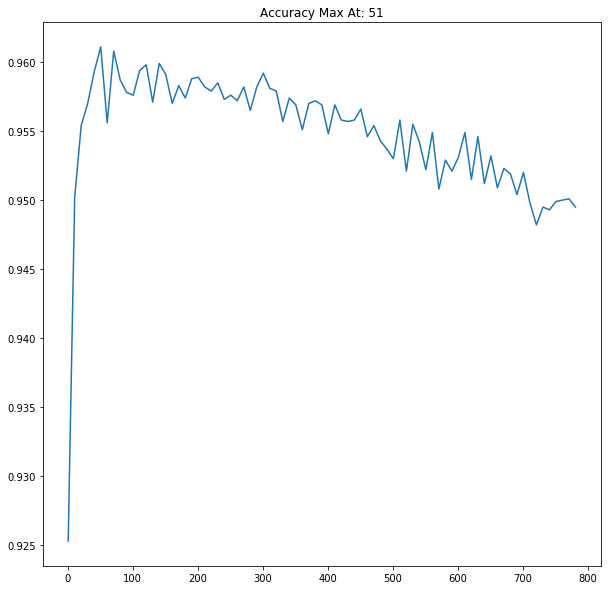

In [4]:
plt.figure(figsize=(10,10))
plt.plot(np.arange(1,28*28,10),log)
plt.title("Accuracy Max At: {}".format(np.arange(1,28*28,10)[np.argmax(log)]))
plt.show()

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done 255 out of 255 | elapsed: 36.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 255 out of 255 | elapsed:    0.4s finished


Text(0.5, 1.0, 'Random Forest Feature Importances (Acc: 0.9707)')

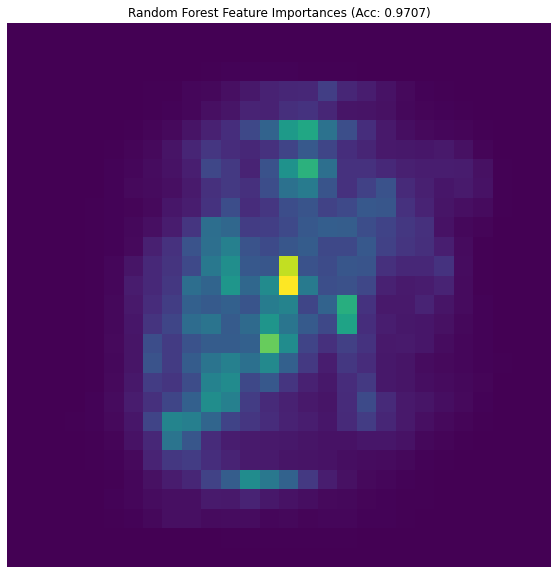

In [5]:
# Plot the importance there

best_features = RandomForestClassifier(max_features = 100,
                                       n_estimators = 255,
                                       n_jobs = -1,
                                       verbose = 1,
                                       random_state = 8675309)
best_features.fit(x_train,y_train)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(best_features.feature_importances_.reshape(28,28))
plt.title("Random Forest Feature Importances (Acc: {})".format(best_features.score(x_test,y_test)))